# Import Packages

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
import math
import random

# Define Functions

In [2]:
def scatter(dataset: pd.DataFrame, column: str) -> None:
    """
    Scater plots a columns of a dataset against the Sales_QTY
    :param dataset: pd.DataFrame to be visualized
    :param column: Name of column (str) to be plotted against Weekly_sales
    :return: None
    """
    plt.figure(figsize=(5, 2))
    plt.scatter(dataset[column].fillna('NA'), dataset['Turnover'])
    plt.ylabel('Turnover')
    plt.xlabel(column)
    plt.xticks(rotation=45)


In [3]:
def plot_timeseries(samples: int, sales: pd.core.frame.DataFrame) -> None:
    """
    Vizualize certain timeseries.
    :param: samples: list of lists with Site ID - Article combinations to be vizualized.
            Example: [['g590', 1282277826], ['g115', 1254150002], ['g102', 1264627019]]
    :param: sales: DataFrame containing the sales data (columns SKU, Site_ID & Year_Week required)
    :return None
    """
    fig, axs = plt.subplots(math.ceil(n_series / 3), 3, figsize=(14, n_series * .6))
    axs = axs.flatten()
    ax_idx = 0

    for site, article in samples:
        df_article = sales.loc[df.SKU == article].loc[df.Site_ID == site].sort_values(by='Date').reset_index()

        df_article.plot(x='Date',
                     y='Sales_QTY',
                     title= f'SKU: {article}, Site ID: {site}',
                     legend=False,
                     ylabel = 'Sales QTY',
                     xlabel = '',
                     rot=15,
                     ax=axs[ax_idx])        
        ax_idx += 1

    plt.tight_layout()
    plt.show()


In [4]:
def plot_aggregated_timeseries(df: pd.DataFrame, kv: list, figsize: tuple = (13,3)) -> None:
    """
    Aggregates a DataFrame according to key / value pair and visualize aggregated Turnover timeseries.
    
    :param df: pandas.DataFrame to be aggregated and visualized
    :param kv: list of duples with key/value pairs used for the aggregation.
               Example: [('CENSHARE_CAT_1', 'Herren'),('CENSHARE_CAT_2', 'Jacken')]
    :param figsize: Site of the plot (tuple), default (12,3)
    :return None
    """
    d = df.copy()
    for key,value in kv:
        d = d.loc[d[key] == value]

        if d.empty:
            raise RuntimeError(f'DataFrame is empty after filtering for {key} == {value}')
            
    n_timeseries = d[['SKU','Site_ID']].drop_duplicates().shape[0]
    print(f'Found {n_timeseries} timeseries with given key / value pair to be aggregated.')

    a = pd.pivot_table(d, values='Turnover', index=['Date'], aggfunc=np.mean)
    a.reset_index(level='Date', inplace=False)
    ax = a.Turnover.plot(
        title=' & '.join([f'{k} = {v}' for k,v in kv]),
        figsize=figsize                                      
    )
    ax.set_ylabel('Turnover')

# Sales

## Import Data

In [5]:
# Import data set
columns = 'Date, SKU, Site_ID, Sales_QTY, Turnover, Article_Desc, Season_Year, Vendor_ID, Vendor_Name, Price_Level, Web_Article, CENSHARE_CAT_1, CENSHARE_CAT_2, CENSHARE_CAT_3'
query = f'SELECT {columns} FROM `globus-datahub-dev.Verteiler_PoC.timeseries_sales_weekly` where Year >= 2015 and (Year <= 2019 OR (Year = 2020 AND Week <= 47)) order by sku, site_id, year, week desc'
sales_df_raw = utils.bq_to_dataframe(query, verbose=True).pipe(utils.reduce_memory_usage)

********************
Query Duration:  0:04:41.095345
Mem. usage decreased to 677.81 Mb (16.1% reduction)


In [6]:
df = sales_df_raw.copy()
df

,Date,SKU,Site_ID,Sales_QTY,Turnover,Article_Desc,Season_Year,Vendor_ID,Vendor_Name,Price_Level,Web_Article,CENSHARE_CAT_1,CENSHARE_CAT_2,CENSHARE_CAT_3
0,2015W53,1014557,101,1.0,25.900000,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
1,2015W52,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
2,2015W51,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
3,2015W50,1014557,101,3.0,77.699997,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
4,2015W49,1014557,101,4.0,103.599998,DOPPELWIEGEMESSER CX/15CM DOPPEL,9999,0000126656,Schwarz Kitchen Selection SA,mittlere Preislage,X,Kuche,Kuchenmesser,wiegemesser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561049,2020W47,1289328500,101,4.0,56.090000,CRATE FALTKISTE BLAU GRÜN 40X30X14.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7561050,2020W47,1289328600,101,2.0,29.799999,CRATE FALTKISTE OFF WHITE 40X30X14.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7561051,2020W47,1289328700,101,5.0,32.869999,CRATE FALTKISTE EIS BLAU 26.5X17X10.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe
7561052,2020W47,1289328800,101,4.0,27.600000,CRATE FALTKISTE BLAU GRÜN 26.5X17X10.5CM,9999,0000948934,HAY ApS,mittlere Preislage,X,Ordnung & Aufbewahrung,Korbe & Boxen,korbe


## Analyse Structure and Missing Values

In [7]:
# Count the number of articles
df.SKU.drop_duplicates().count()

9273

In [8]:
# Count the number of Sites
df.Site_ID.drop_duplicates().count()

9

In [9]:
# Get the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561054 entries, 0 to 7561053
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   SKU             int32  
 2   Site_ID         int16  
 3   Sales_QTY       float32
 4   Turnover        float32
 5   Article_Desc    object 
 6   Season_Year     object 
 7   Vendor_ID       object 
 8   Vendor_Name     object 
 9   Price_Level     object 
 10  Web_Article     object 
 11  CENSHARE_CAT_1  object 
 12  CENSHARE_CAT_2  object 
 13  CENSHARE_CAT_3  object 
dtypes: float32(2), int16(1), int32(1), object(10)
memory usage: 677.8+ MB


In [10]:
# Get structure of DataFrame and numer of missing values

print("Structure of Sales Data:\n", df.shape, '\n')

pd.DataFrame({"Number of Missing Values": df.drop_duplicates().isnull().sum(),
             "In Percent": df.isnull().sum()*100/len(df)}
              ).round(2).sort_values(by='Number of Missing Values',ascending=False)


Structure of Sales Data:
 (7561054, 14) 



,Number of Missing Values,In Percent
CENSHARE_CAT_3,313028,4.14
CENSHARE_CAT_1,67308,0.89
CENSHARE_CAT_2,67308,0.89
Price_Level,12402,0.16
Date,0,0.00
SKU,0,0.00
Site_ID,0,0.00
Sales_QTY,0,0.00
Turnover,0,0.00
Article_Desc,0,0.00


## Compute Key Statistical Properties of Sales_QTY and Turnover

In [11]:
# Generate descriptive statistics using pandas.DataFrame.describe()
df[['Sales_QTY', 'Turnover']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_QTY,7561054.0,0.379934,1.645679,-81.0,0.0,0.0,0.0,640.000000
Turnover,7561054.0,15.131460,94.272575,-16119.0,0.0,0.0,0.0,73117.148438


In [12]:
# Compute various quantiles of Sales_QTY and Turnover
pd.DataFrame({"Quantiles": np.arange(0, 1.05, 0.05),
              "Sales_QTY": df.Sales_QTY.quantile(np.arange(0, 1.05, 0.05)),
              "Turnover": df.Turnover.quantile(np.arange(0, 1.05, 0.05)),
             }).T.round(2)

# Remark: negative Sales_QTY/Turnover occur when a customer returns a product

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
Quantiles,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.00
Sales_QTY,-81.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,1.00,1.0,2.00,640.00
Turnover,-16119.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,10.90,35.8,79.90,73117.15


In [13]:
# Compute various quantiles of Sales_QTY and Turnover
pd.DataFrame({"Quantiles": np.arange(0, 1.05, 0.05),
              "Sales_QTY": df.Sales_QTY.quantile(np.arange(0, 1.05, 0.05)),
              "Turnover": df.Turnover.quantile(np.arange(0, 1.05, 0.05)),
             }).T.round(2).to_latex('latex.tex')

# Remark: negative Sales_QTY/Turnover occur when a customer returns a product

## Analyse Article Masterdata

In [14]:
# Compute the number of articles per Season_Year (normalized)
df[['SKU', 'Season_Year', 'SKU']].drop_duplicates().Season_Year.value_counts(normalize=True)

# Remark:  articles with Season_Year 9999 are articles not dedicated to a yearly collection 
#                and they are sold during multiple years

9999    0.968403
2020    0.021137
2021    0.007549
2018    0.001941
2019    0.000971
Name: Season_Year, dtype: float64

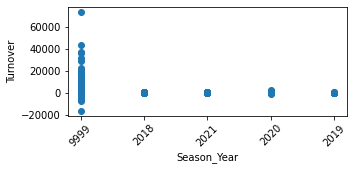

In [15]:
# Generate a scatter plot of Season_Year vs Turnover
scatter(df, 'Season_Year')

In [16]:
# Get the number of vendors / suppliers and count print the vendors with the most articles (normalized)
print('Number of vendors: ', df.Vendor_Name.drop_duplicates().count())

print('\nVendor and their normalized counts (sorted):')
df[['SKU', 'Vendor_Name']].drop_duplicates().Vendor_Name.value_counts(normalize=True).head(15)

Number of vendors:  226

Vendor and their normalized counts (sorted):


Weseta Textil AG                   0.047881
Griftextil                         0.046695
Team Trade Import & Export GmbH    0.046587
SERAX NV                           0.029225
BALSIGER TEXTIL AG                 0.029009
Maison Truffe AG                   0.027607
E+H Services AG                    0.026313
AB Siulas                          0.025127
Vitra AG                           0.023293
Le Creuset Swiss AG                0.022215
Alessi SPA                         0.021892
Samsonite AG                       0.020490
HAY ApS                            0.019843
Kuhn Rikon AG                      0.019627
A.W. FABER-CASTELL SCHWEIZ AG      0.018872
Name: Vendor_Name, dtype: float64

In [17]:
# Get the number of Censhare Categories and their counts (normalized)
df[['SKU', 'Price_Level']].drop_duplicates().Price_Level.value_counts(normalize=True)

mittlere Preislage    0.655997
obere Preislage       0.291013
Premium Preislage     0.043690
untere Preislage      0.009084
ohne Preislage        0.000216
Name: Price_Level, dtype: float64

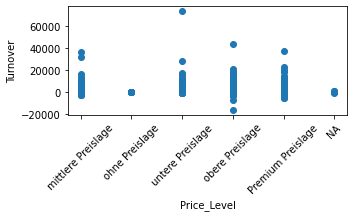

In [18]:
# Generate a scatter plot of Price_Level vs Turnover
scatter(df, 'Price_Level')

In [19]:
# Get the number of Censhare Categories and their counts (normalized)
df[['SKU', 'Web_Article']].drop_duplicates().Web_Article.value_counts(normalize=True)

X    0.967756
     0.032244
Name: Web_Article, dtype: float64

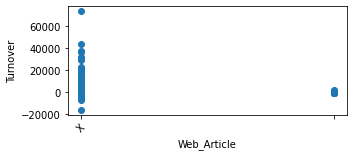

In [20]:
# Generate a scatter plot of Web_Article vs Turnover
scatter(df, 'Web_Article')

In [21]:
d1 = df[['SKU','Site_ID','CENSHARE_CAT_1']].drop_duplicates().CENSHARE_CAT_1.value_counts(normalize=False).to_frame().reset_index()
d1 = d1.merge(df[['SKU','Site_ID','CENSHARE_CAT_1']].drop_duplicates().CENSHARE_CAT_1.value_counts(normalize=True).to_frame().reset_index(), on=['index'])
d1 = d1.rename(columns={'index': 'Category Name', 'CENSHARE_CAT_1_x': 'Count', 'CENSHARE_CAT_1_y': 'In Percent'})

d1

,Category Name,Count,In Percent
0,Kuche,12606,0.220686
1,Tisch,11395,0.199485
2,Wohnen,7063,0.123648
3,Bett,6530,0.114317
4,Papeterie,5852,0.102447
5,Bad,5433,0.095112
6,Reisegepack,2378,0.041630
7,Heim & Haushalt,2174,0.038059
8,Ordnung & Aufbewahrung,1533,0.026837
9,Elektronik Gadget,1199,0.020990


In [22]:
d2 = df[['SKU','Site_ID','CENSHARE_CAT_2']].drop_duplicates().CENSHARE_CAT_2.value_counts(normalize=False).to_frame().reset_index()
d2 = d2.merge(df[['SKU','Site_ID','CENSHARE_CAT_2']].drop_duplicates().CENSHARE_CAT_2.value_counts(normalize=True).to_frame().reset_index(), on=['index'])
d2 = d2.rename(columns={'index': 'Category Name', 'CENSHARE_CAT_2_x': 'Count', 'CENSHARE_CAT_2_y': 'In Percent'})

d2

,Category Name,Count,In Percent
0,Bettwasche,4006,0.070131
1,Badtextil,3360,0.058821
2,Kuchenhelfer,3244,0.056791
3,Raumduft & Duftkerzen,2737,0.047915
4,Geschirr,2702,0.047302
...,...,...,...
82,Haushalthilfen,12,0.000210
83,Pflege,9,0.000158
84,Salze,9,0.000158
85,Picknick,7,0.000123


In [23]:
d2.iloc[43,:]

Category Name    Papierservietten
Count                         303
In Percent               0.005304
Name: 43, dtype: object

In [24]:
d1 = df.CENSHARE_CAT_1.value_counts(normalize=True).head(15).to_frame().reset_index().rename(columns={'index': 'Name', 'CENSHARE_CAT_1': 'Count (normalized)'})
d2 = df.CENSHARE_CAT_2.value_counts(normalize=True).head(15).to_frame().reset_index().rename(columns={'index': 'Name', 'CENSHARE_CAT_2': 'Count (normalized)'})


In [25]:
pd.concat([d1, d2], axis=1, keys=('CENSHARE_CAT_1','CENSHARE_CAT_2')).round(3).to_latex('latex.tex')

In [26]:
# Get the number of Censhare Categories and their counts (normalized)
# -> 1st hierarchy level of product category
print('Number of categories: ', df.CENSHARE_CAT_1.drop_duplicates().count())

print('\nCategories and their normalized counts (sorted):')
df[['SKU', 'CENSHARE_CAT_1']].drop_duplicates().CENSHARE_CAT_1.value_counts(normalize=True)

Number of categories:  17

Categories and their normalized counts (sorted):


Kuche                     0.194212
Tisch                     0.183332
Bett                      0.128169
Wohnen                    0.125775
Papeterie                 0.103906
Bad                       0.098683
Reisegepack               0.056142
Heim & Haushalt           0.048417
Ordnung & Aufbewahrung    0.022848
Elektronik Gadget         0.020781
Outdoor                   0.011315
Damen Accessoires         0.003699
Lingerie                  0.001088
Herren                    0.000762
Kinder                    0.000653
Beauty                    0.000109
Gewurze                   0.000109
Name: CENSHARE_CAT_1, dtype: float64

In [27]:
df[['SKU','Site_ID']].drop_duplicates()

,SKU,Site_ID
0,1014557,101
308,1014557,102
616,1014557,103
924,1014557,106
1232,1014557,107
...,...,...
7561049,1289328500,101
7561050,1289328600,101
7561051,1289328700,101
7561052,1289328800,101


In [28]:
# Get the number of Censhare Categories and their counts (normalized)
# -> 2nd hierarchy level of product category
print('Number of categories: ', df.CENSHARE_CAT_2.drop_duplicates().count())

print('\nCategories and their normalized counts (sorted):')
df[['SKU', 'CENSHARE_CAT_2']].drop_duplicates().CENSHARE_CAT_2.value_counts(normalize=True)

Number of categories:  87

Categories and their normalized counts (sorted):


Bettwasche               0.085627
Badtextil                0.068001
Geschirr                 0.048526
Raumduft & Duftkerzen    0.048308
Kuchenhelfer             0.047982
                           ...   
Picknick                 0.000218
Haushalthilfen           0.000218
Salze                    0.000109
Geschenksets             0.000109
Pflege                   0.000109
Name: CENSHARE_CAT_2, Length: 87, dtype: float64

In [29]:
# Get the number of Censhare Categories and their counts (normalized)
# -> 3rd hierarchy level of product category
print('Number of categories: ', df.CENSHARE_CAT_3.drop_duplicates().count())

print('\nCategories and their normalized counts (sorted):')
df[['SKU', 'CENSHARE_CAT_3']].drop_duplicates().CENSHARE_CAT_3.value_counts(normalize=True)

Number of categories:  359

Categories and their normalized counts (sorted):


frottierwasche    0.060195
kissenbezug       0.049770
duvetbezug        0.033965
fixleintuch       0.025670
lesebrille        0.025558
                    ...   
brillenetui       0.000112
handwerk          0.000112
ersatzhefte       0.000112
glacemaschine     0.000112
allzweckbugel     0.000112
Name: CENSHARE_CAT_3, Length: 359, dtype: float64

# Plot Random Time-Series

In [30]:
def plot_timeseries(samples: int, sales: pd.core.frame.DataFrame) -> None:
    """
    Vizualize certain timeseries.
    :param: samples: list of lists with Site ID - Article combinations to be vizualized.
            Example: [['g590', 1282277826], ['g115', 1254150002], ['g102', 1264627019]]
    :param: sales: DataFrame containing the sales data (columns SKU, Site_ID & Year_Week required)
    :return None
    """
    fig, axs = plt.subplots(math.ceil(n_series / 3), 3, figsize=(14, n_series * .6))
    axs = axs.flatten()
    ax_idx = 0

    for site, article in samples:
        df_article = sales.loc[df.SKU == article].loc[df.Site_ID == site].sort_values(by='Date').reset_index()

        df_article.plot(x='Date',
                     y='Sales_QTY',
                     title= f'SKU: {article}, Site ID: {site}',
                     legend=False,
                     ylabel = 'Sales QTY',
                     xlabel = '',
                     rot=15,
                     ax=axs[ax_idx])        
        ax_idx += 1

    plt.tight_layout()
    plt.savefig('fig.pdf')
    plt.show()
    


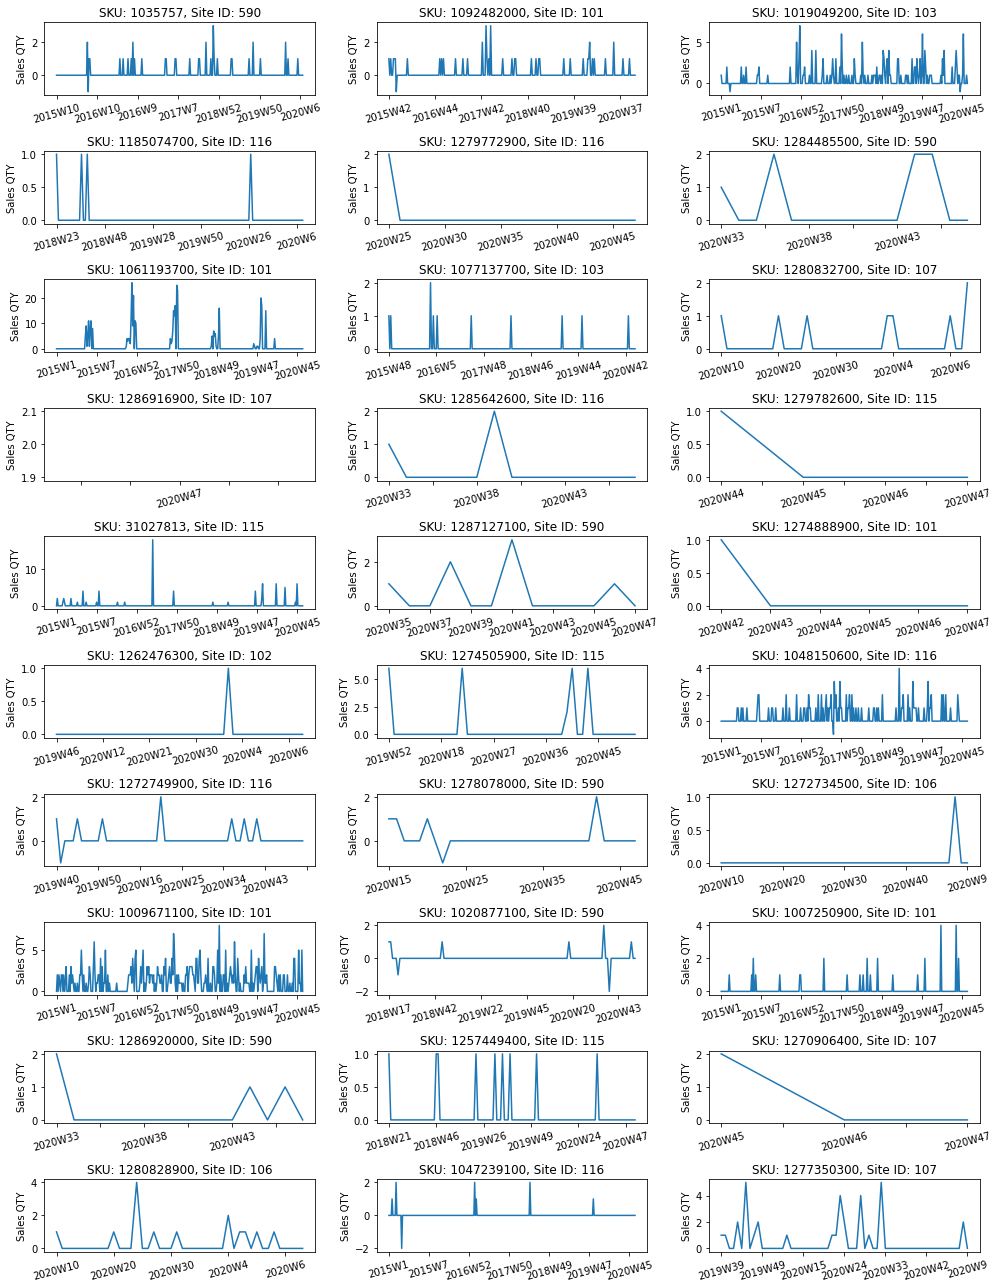

In [31]:
n_series = 30

samples = df[['Site_ID','SKU']].drop_duplicates().sample(n=n_series, random_state=8).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series for Top-Sellers

In [32]:
# Get SKU / Store combinations with a mean sale greater a threshold
top_sellers_mean = df[['Site_ID', 'SKU', 'Sales_QTY']].groupby(['Site_ID', 'SKU']).mean() 
top_sellers_mean = top_sellers_mean.loc[top_sellers_mean.Sales_QTY > 0.4]
top_sellers_mean

Sales_QTY
Site_ID SKU                  
101     1014557      0.918831
        1014824      0.681818
        1016525      0.983766
        1016800      1.535714
        1017246      2.532468
...                       ...
590     1288744100   1.000000
        1288744200   1.000000
        1288764800   1.000000
        1288782700   1.000000
        1288785900   4.000000

[15277 rows x 1 columns]

In [33]:
# Get SKU / Store combinations which timeseries is longer than a threshold
top_sellers_length = df[['Site_ID', 'SKU', 'Sales_QTY']].loc[df.Sales_QTY > 0].groupby(['Site_ID', 'SKU']).count()
top_sellers_length = top_sellers_length.loc[top_sellers_length.Sales_QTY > 5]
top_sellers_length

Sales_QTY
Site_ID SKU                  
101     1014557           165
        1014824           128
        1016525           159
        1016800           214
        1017246           248
...                       ...
590     1287126400          6
        1287304400          7
        1288167800          8
        1288168100          6
        1288182300          6

[35714 rows x 1 columns]

In [34]:
# select only SKUs that meet both requirements 
top_sellers = top_sellers_mean.merge(top_sellers_length, how='inner', on=['Site_ID', 'SKU'])
top_sellers = top_sellers.reset_index(drop=False)[['Site_ID', 'SKU']]
top_sellers

,Site_ID,SKU
0,101,1014557
1,101,1014824
2,101,1016525
3,101,1016800
4,101,1017246
...,...,...
11939,590,1287126400
11940,590,1287304400
11941,590,1288167800
11942,590,1288168100


In [35]:
# Print number of articles that are top sellers (it at least one store)
len(top_sellers.SKU.drop_duplicates())

3675

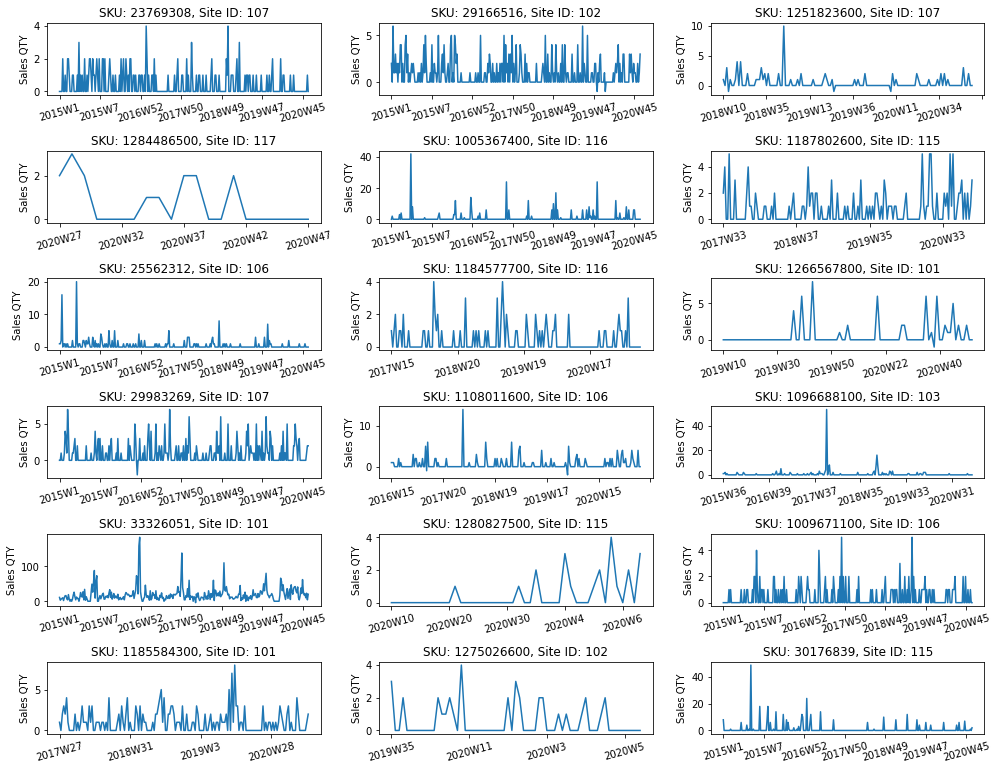

In [36]:
n_series = 18

samples = top_sellers.sample(n=n_series, random_state=1).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series of Aggregated Sales

Found 57634 timeseries with given key / value pair to be aggregated.


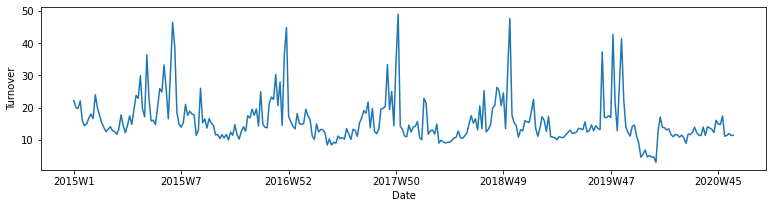

In [37]:
# Total Sale
plot_aggregated_timeseries(df, [])

Found 12606 timeseries with given key / value pair to be aggregated.


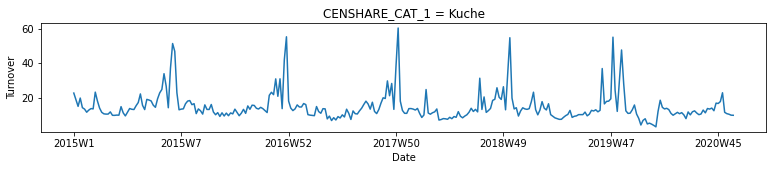

In [38]:
# Censhare Category 1
key_values =  [('CENSHARE_CAT_1', 'Kuche')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))

Found 62 timeseries with given key / value pair to be aggregated.


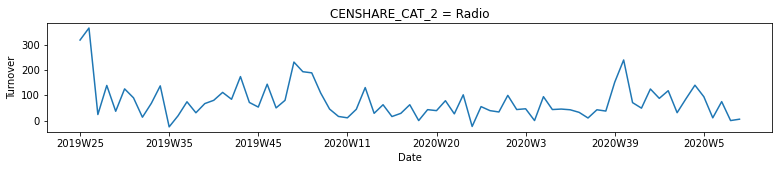

In [39]:
# Censhare Category 2
key_values =  [('CENSHARE_CAT_2', 'Radio')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))

Found 7 timeseries with given key / value pair to be aggregated.


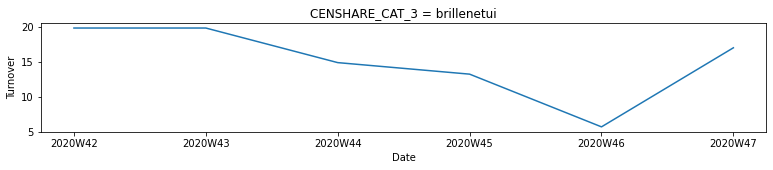

In [40]:
# Censhare Category 3
key_values =  [('CENSHARE_CAT_3', 'brillenetui')]

plot_aggregated_timeseries(df, key_values, figsize=(13,2))